In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


# EDA & Feature Engineering

<li>SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.</li>
<li>MSSubClass: The building class</li>
<li>MSZoning: The general zoning classification</li>
<li>LotFrontage: Linear feet of street connected to property</li>
<li>LotArea: Lot size in square feet</li>
<li>Street: Type of road access</li>
<li>Alley: Type of alley access</li>
<li>LotShape: General shape of property</li>
<li>LandContour: Flatness of the property</li>
<li>Utilities: Type of utilities available</li>
<li>LotConfig: Lot configuration</li>
<li>LandSlope: Slope of property</li>
<li>Neighborhood: Physical locations within Ames city limits</li>
<li>Condition1: Proximity to main road or railroad</li>
<li>Condition2: Proximity to main road or railroad (if a second is present)</li>
<li>BldgType: Type of dwelling</li>
<li>HouseStyle: Style of dwelling</li>
<li>OverallQual: Overall material and finish quality</li>
<li>OverallCond: Overall condition rating</li>
<li>YearBuilt: Original construction date</li>
<li>YearRemodAdd: Remodel date</li>
<li>RoofStyle: Type of roof</li>
<li>RoofMatl: Roof material</li>
<li>Exterior1st: Exterior covering on house</li>
<li>Exterior2nd: Exterior covering on house (if more than one material)</li>
<li>MasVnrType: Masonry veneer type</li>
<li>MasVnrArea: Masonry veneer area in square feet</li>
<li>ExterQual: Exterior material quality</li>
<li>ExterCond: Present condition of the material on the exterior</li>
<li>Foundation: Type of foundation</li>
<li>BsmtQual: Height of the basement</li>
<li>BsmtCond: General condition of the basement</li>
<li>BsmtExposure: Walkout or garden level basement walls</li>
<li>BsmtFinType1: Quality of basement finished area</li>
<li>BsmtFinSF1: Type 1 finished square feet</li>
<li>BsmtFinType2: Quality of second finished area (if present)</li>
<li>BsmtFinSF2: Type 2 finished square feet</li>
<li>BsmtUnfSF: Unfinished square feet of basement area</li>
<li>TotalBsmtSF: Total square feet of basement area</li>
<li>Heating: Type of heating</li>
<li>HeatingQC: Heating quality and condition</li>
<li>CentralAir: Central air conditioning</li>
<li>Electrical: Electrical system</li>
<li>1stFlrSF: First Floor square feet</li>
<li>2ndFlrSF: Second floor square feet</li>
<li>LowQualFinSF: Low quality finished square feet (all floors)</li>
<li>GrLivArea: Above grade (ground) living area square feet</li>
<li>BsmtFullBath: Basement full bathrooms</li>
<li>BsmtHalfBath: Basement half bathrooms</li>
<li>FullBath: Full bathrooms above grade</li>
<li>HalfBath: Half baths above grade</li>
<li>Bedroom: Number of bedrooms above basement level</li>
<li>Kitchen: Number of kitchens</li>
<li>KitchenQual: Kitchen quality</li>
<li>TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)</li>
<li>Functional: Home functionality rating</li>
<li>Fireplaces: Number of fireplaces</li>
<li>FireplaceQu: Fireplace quality</li>
<li>GarageType: Garage location</li>
<li>GarageYrBlt: Year garage was built</li>
<li>GarageFinish: Interior finish of the garage</li>
<li>GarageCars: Size of garage in car capacity</li>
<li>GarageArea: Size of garage in square feet</li>
<li>GarageQual: Garage quality</li>
<li>GarageCond: Garage condition</li>
<li>PavedDrive: Paved driveway</li>
<li>WoodDeckSF: Wood deck area in square feet</li>
<li>OpenPorchSF: Open porch area in square feet</li>
<li>EnclosedPorch: Enclosed porch area in square feet</li>
<li>3SsnPorch: Three season porch area in square feet</li>
<li>ScreenPorch: Screen porch area in square feet</li>
<li>PoolArea: Pool area in square feet</li>
<li>PoolQC: Pool quality</li>
<li>Fence: Fence quality</li>
<li>MiscFeature: Miscellaneous feature not covered in other categories</li>
<li>MiscVal: $Value of miscellaneous feature</li>
<li>MoSold: Month Sold</li>
<li>YrSold: Year Sold</li>
<li>SaleType: Type of sale</li>
<li>SaleCondition: Condition of sale</li>


In [2]:
ds = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
ds.shape

(1460, 81)

As we can see, there are 81 columns and 1460 rows in train data

First of all, let's check dataset info with info() method

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

As we can see, there are lots of categorical data that we need to transform in order to be able to train our model

Let's see all missing values.

<Axes: title={'center': 'Number of missing values'}>

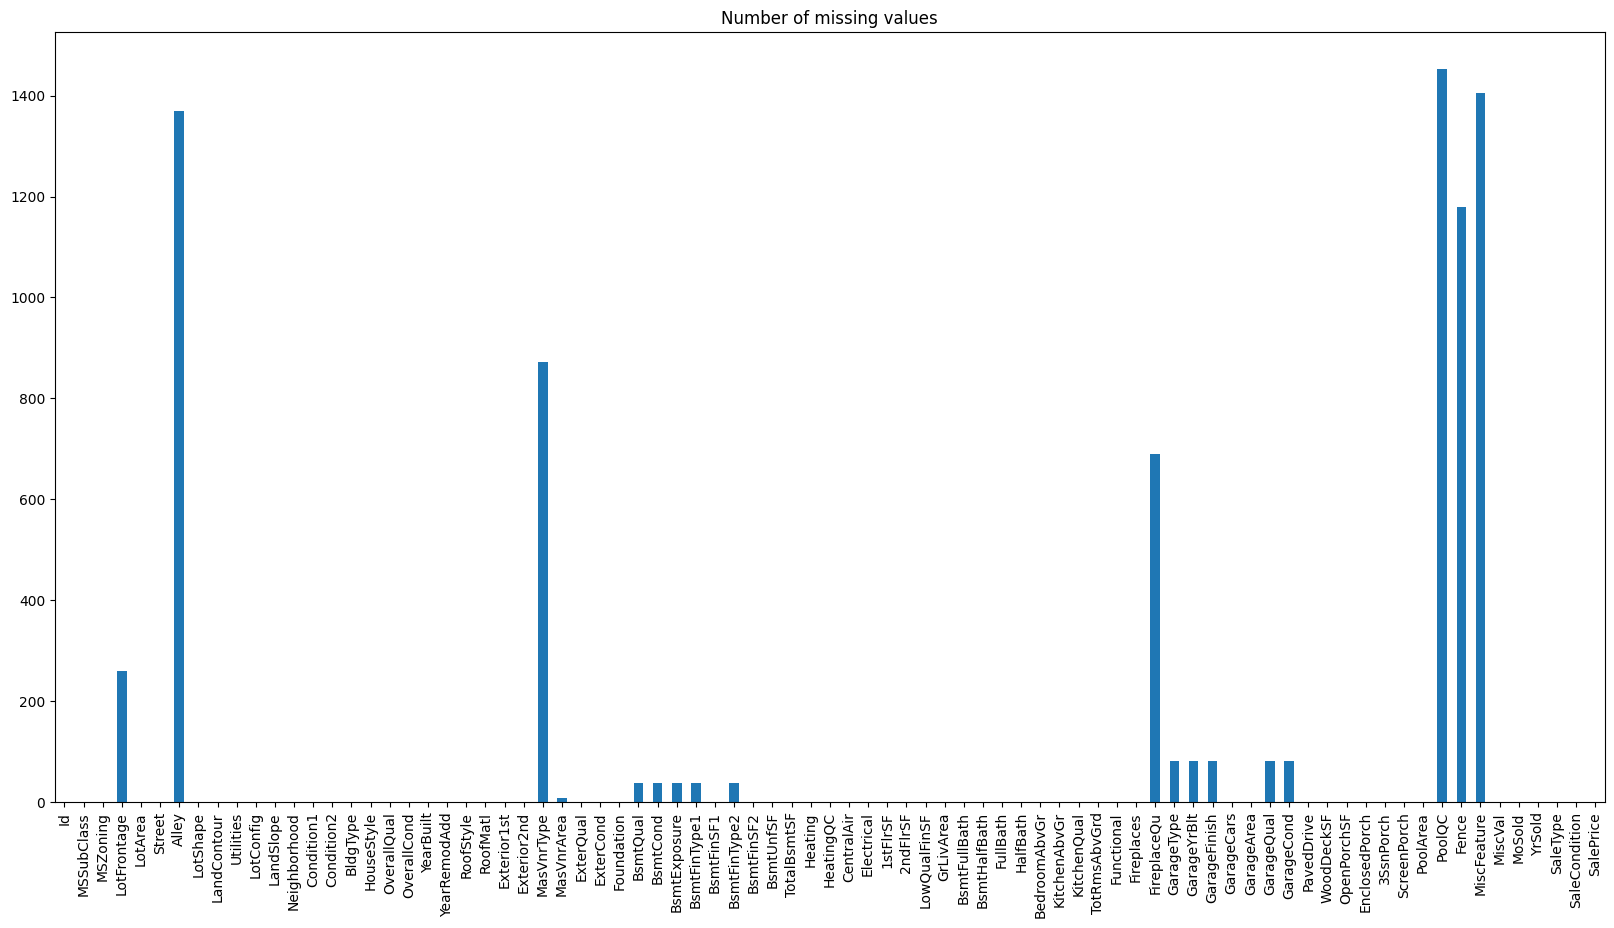

In [5]:
ds.isnull().sum().plot.bar(figsize=(20,10), title='Number of missing values')

As we can see here, there are not so many columns with missing values. Moreover, columns with categorical data may have NaN, which means (as in the case of the Alley column, for example) that they do not have this feature (Houses without Alley).

So let's start fixing missing values ​​in integer or float columns. We need to get a list of all these columns.

In [6]:
int64_columns = ds.select_dtypes(include=['int64'])
int64_columns.isnull().any()

Id               False
MSSubClass       False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

There are no missing values in integer columns. Let's move to float.

In [7]:
float64_columns = ds.select_dtypes(include=['float64'])
float64_columns.isnull().any()

LotFrontage    True
MasVnrArea     True
GarageYrBlt    True
dtype: bool

All float64 columns have missing values in them.

We're going to check how many NaNs are actually contained in these columns.

In [8]:
float64_columns.isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

Okay, now we need to figure out how we will fill in the missing values. We can't simply delete them since the dataset only contains 1460 rows, so deleting at least 259 rows should be avoided.

First, let's start fixing the column with the fewest missing values, MasVnrArea.

Print all rows with NaN in MasVnrArea

In [9]:
ds[ds['MasVnrArea'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


According to the data description, there are two columns describing masonry veneer:

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	        None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet


So perhaps if MasVnrType is None, then MasVnrArea will be NaN as well. Let's check this out.

In [10]:
ds[ds['MasVnrArea'].isnull()][['MasVnrArea', 'MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


And yeah, our hypothesis is correct. But the problem is that there are more than 800 rows with None in MasVnrType. But what is the value in the column MasVnrArea of such rows?

In [11]:
ds[ds['MasVnrType'].isnull()][['MasVnrArea']].value_counts()

MasVnrArea
0.0           859
1.0             2
288.0           1
312.0           1
344.0           1
Name: count, dtype: int64

859 zeros. I think we have good reason to say that the missing values in the column MasVnrArea should be 0.

In [12]:
ds['MasVnrArea'] = ds['MasVnrArea'].fillna(0)

Interesting fact: it turned out that we simply filled in the missing values ​​with the most common value in this column. Look at this chart

Text(0.5, 1.0, 'Number of zeros compared to non-zeros')

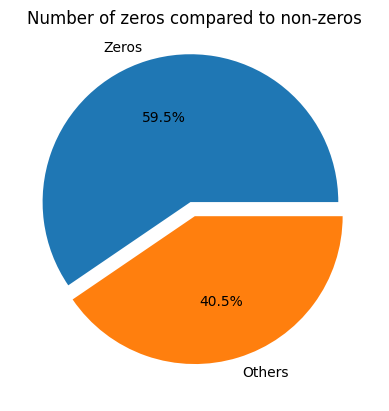

In [13]:
import matplotlib.pyplot as plt

only_zeros = len(ds[ds['MasVnrArea'] == 0])
others = len(ds[ds['MasVnrArea'] != 0])

plt.pie([only_zeros, others], explode=[0.1, 0], labels=['Zeros', 'Others'], autopct='%1.1f%%')
plt.title("Number of zeros compared to non-zeros")

As we can see, MasVnrArea contains almost 60% zeros compared to non-zero numbers

Now we are going to work with the GarageYrBlt. Here is a description of the columns associated with GarageYrBlt: 

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

Let's do the same thing we did with MasVnrArea: check if the NA in GarageType is associated with the NA in GarageYrBlt.

In [14]:
ds[ds['GarageType'].isnull()][['GarageYrBlt', 'GarageType']].isnull().sum()

GarageYrBlt    81
GarageType     81
dtype: int64

We see the same situation. Now let's check how many NaNs are in GarageType, GarageYrBlt and GarageFinish.

In [15]:
ds[['GarageYrBlt', 'GarageType', 'GarageFinish']].isnull().sum()

GarageYrBlt     81
GarageType      81
GarageFinish    81
dtype: int64

We can notice that there are the same number of them. I suggest finally checking that the missing values in the GarageFinish column are in the same rows that contain NaN in the GarageYrBlt column. If so, then it should also be 81.

In [16]:
ds[ds['GarageFinish'].isnull()][['GarageYrBlt', 'GarageFinish']].isnull().sum()

GarageYrBlt     81
GarageFinish    81
dtype: int64

Yup. Now we can confidently say that the missing values in the GarageYrBlt column are due to the fact that there is simply no garage in the house.

Now we need to figure out how to replace the missing values in the GarageYrBuilt column. I suggest just setting -1.

In [17]:
ds['GarageYrBlt'] = ds['GarageYrBlt'].fillna(-1)

Finally, LotFrontage. There are many columns describing the lot. Let's print them.

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

       

In [18]:
ds.filter(like="Lot")

,LotFrontage,LotArea,LotShape,LotConfig
0,65.0,8450,Reg,Inside
1,80.0,9600,Reg,FR2
2,68.0,11250,IR1,Inside
3,60.0,9550,IR1,Corner
4,84.0,14260,IR1,FR2
...,...,...,...,...
1455,62.0,7917,Reg,Inside
1456,85.0,13175,Reg,Inside
1457,66.0,9042,Reg,Inside
1458,68.0,9717,Reg,Inside


Now let's check only rows with NaN in LotFrontage

In [19]:
ds[ds['LotFrontage'].isnull()][['LotFrontage','LotArea', 'LotShape','LotConfig']]

,LotFrontage,LotArea,LotShape,LotConfig
7,NaN,10382,IR1,Corner
12,NaN,12968,IR2,Inside
14,NaN,10920,IR1,Corner
16,NaN,11241,IR1,CulDSac
24,NaN,8246,IR1,Inside
...,...,...,...,...
1429,NaN,12546,IR1,Corner
1431,NaN,4928,IR1,Inside
1441,NaN,4426,Reg,Inside
1443,NaN,8854,Reg,Inside


As we can see, there are many parameters that LotFrontage depends on. Let's plot a box plot to check if there are any anomalous values. I'm going to plot 2 different graphs because the values in LotArea are very large compared to LotFrontage.

<Axes: >

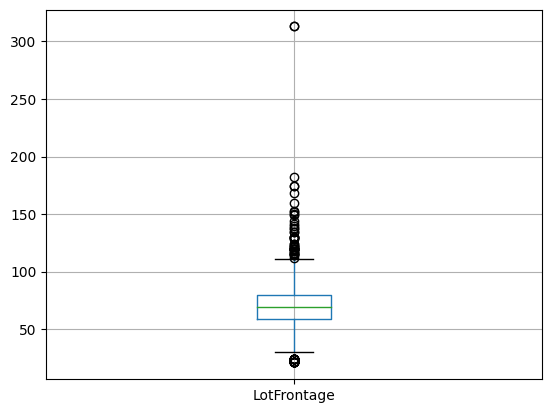

In [20]:
ds.boxplot(column=['LotFrontage'])

<Axes: >

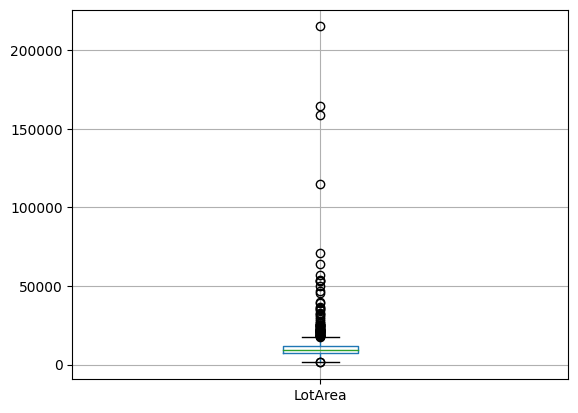

In [21]:
ds.boxplot(column=['LotArea'])

There are a lot of outliers. I will have to use some methods to normalize the data, otherwise it will affect model during training and testing. But we will do this later.

For now let's focus on filling missing values in LotFrontage column. Let's try to do the following: we will make an interval row in the LotArea column, so that instead of the values in each cell, the interval to which this value belongs is recorded. Then we group the data first by LotShape, then by LotConfig and finally, by LotArea. In the end, we will fill the NaNs with the average value in each group.

Using Sturges's rule we will find optimal number of intervals for LotArea column. We have 1460 rows. 

n = 1 + 3,22lgN, where N is the amount of rows. So, 1 + 3,22lg(1460) ~ 11,189 intervals or, rounding up, 12 intervals.

Now we need to find the length of one interval using the following formula: (Xmax - Xmin)/n, where Xmin and Xmax are the smallest and largest values respectively, and n is the number of intervals. Let's find the smallest and largest values:

In [22]:
Xmin = ds['LotArea'].min()
Xmax = ds['LotArea'].max()
Xmin, Xmax

(1300, 215245)

The length of one interval is:

In [23]:
interval_length = (Xmax - Xmin)/12
print(f"The interval length: {interval_length}")

The interval length: 17828.75


Thus, we get the following intervals:

In [24]:
bins = pd.interval_range(start=Xmin, end=Xmax, freq=interval_length, closed='right')
bins

IntervalIndex([(1300.0, 19128.75], (19128.75, 36957.5], (36957.5, 54786.25], (54786.25, 72615.0], (72615.0, 90443.75] ... (126101.25, 143930.0], (143930.0, 161758.75], (161758.75, 179587.5], (179587.5, 197416.25], (197416.25, 215245.0]], dtype='interval[float64, right]')

Now let's add new column LotArea_Intervals where the interval to which the number from LotArea belongs will be written.

In [25]:
ds['LotArea_Intervals'] = pd.cut(ds['LotArea'], bins=bins)
ds

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotArea_Intervals
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,"(1300.0, 19128.75]"
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,"(1300.0, 19128.75]"
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,"(1300.0, 19128.75]"
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,"(1300.0, 19128.75]"
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,"(1300.0, 19128.75]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,"(1300.0, 19128.75]"
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,"(1300.0, 19128.75]"
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,"(1300.0, 19128.75]"
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,"(1300.0, 19128.75]"


Now we will manually add the value to this column in the row where LotArea = 1300 (because NaN is now there, since 1300 is not included in the first interval)

In [26]:
ds[ds['LotArea'] == 1300]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotArea_Intervals
956,957,160,RM,24.0,1300,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,NaN,0,5,2009,WD,Normal,124000,NaN


956 row and 82 column, so:

In [27]:
ds.loc[956, 'LotArea_Intervals'] = pd.Interval(1300.0,  19128.75, closed='right')

Let's check if everything works fine

In [28]:
ds[ds['LotArea'] == 1300]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotArea_Intervals
956,957,160,RM,24.0,1300,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,NaN,0,5,2009,WD,Normal,124000,"(1300.0, 19128.75]"


Check if there are more NaNs in this column

In [29]:
print(f"Total NaNs in the LotArea_Intervals column: {ds['LotArea_Intervals'].isnull().sum()}")

Total NaNs in the LotArea_Intervals column: 0


Good. Now we can start grouping everything.

In [30]:
mean_values = ds.groupby(['LotArea_Intervals', 'LotShape', 'LotConfig'])['LotFrontage'].mean().reset_index()
mean_values.rename(columns={'LotFrontage': 'MeanLotFrontage'}, inplace=True)
ds = ds.merge(mean_values, on=['LotArea_Intervals', 'LotShape', 'LotConfig'], how='left')
ds['LotFrontage'] = ds['LotFrontage'].fillna(ds['MeanLotFrontage'])
ds.drop(columns=['MeanLotFrontage'], inplace=True)

<ipython-input-30-5637e5a8c7a3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = ds.groupby(['LotArea_Intervals', 'LotShape', 'LotConfig'])['LotFrontage'].mean().reset_index()


Let's check if there are any more NaNs left.

In [31]:
print(f"Total NaNs in the LotFrontage column: {ds['LotFrontage'].isnull().sum()}")

Total NaNs in the LotFrontage column: 5


Printing them out:

In [32]:
ds[ds['LotFrontage'].isnull()][['LotArea_Intervals', 'LotShape', 'LotConfig']]

,LotArea_Intervals,LotShape,LotConfig
249,"(143930.0, 161758.75]",IR2,CulDSac
335,"(161758.75, 179587.5]",IR1,Corner
384,"(36957.5, 54786.25]",IR2,Corner
660,"(1300.0, 19128.75]",Reg,CulDSac
706,"(108272.5, 126101.25]",IR2,CulDSac


It looks like, there are no more rows with the same LotShape, LotConfig and Interval as in these rows.

In [33]:
ds[(ds.LotArea_Intervals == pd.Interval(143930.0,  161758.75, closed='right')) & (ds.LotShape == 'IR2') & (ds.LotConfig == 'CulDSac')]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotArea_Intervals
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,NaN,NaN,Shed,500,6,2007,WD,Normal,277000,"(143930.0, 161758.75]"


As you can see, only one row has this values: (143930.0, 161758.75]	IR2	CulDSac.

Let's just group by Lot Shape(not by interval, as there may be a situation where only one row is included in the interval), find mean value and fill all NaNs.

In [34]:
mean_values = ds.groupby(['LotShape'])['LotFrontage'].mean().reset_index()
mean_values.rename(columns={'LotFrontage': 'MeanLotFrontage'}, inplace=True)
ds = ds.merge(mean_values, on=['LotShape'], how='left')
ds['LotFrontage'] = ds['LotFrontage'].fillna(ds['MeanLotFrontage'])
ds.drop(columns=['MeanLotFrontage'], inplace=True)

In [35]:
print(f"Total NaNs in the LotFrontage column: {ds['LotFrontage'].isnull().sum()}")

Total NaNs in the LotFrontage column: 0


Nice. We have filled all missing values in float columns. Let's build boxplot for LotFrontage

<Axes: >

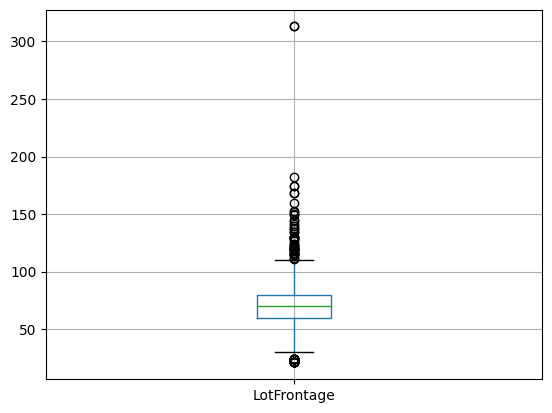

In [36]:
ds.boxplot(column=['LotFrontage'])

You may notice that there are a lot of outlier values in this column. Undoubtedly, some values could have been added by me while I was filling in the missing ones (because it could be that I was looking for an average value between 2 numbers, for example, 300 and 50, which would lead to an outlier), however, it should be said that there cannot be many of them, since I used the average value therefore , most of them should be in the range between the lower and upper quartiles

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


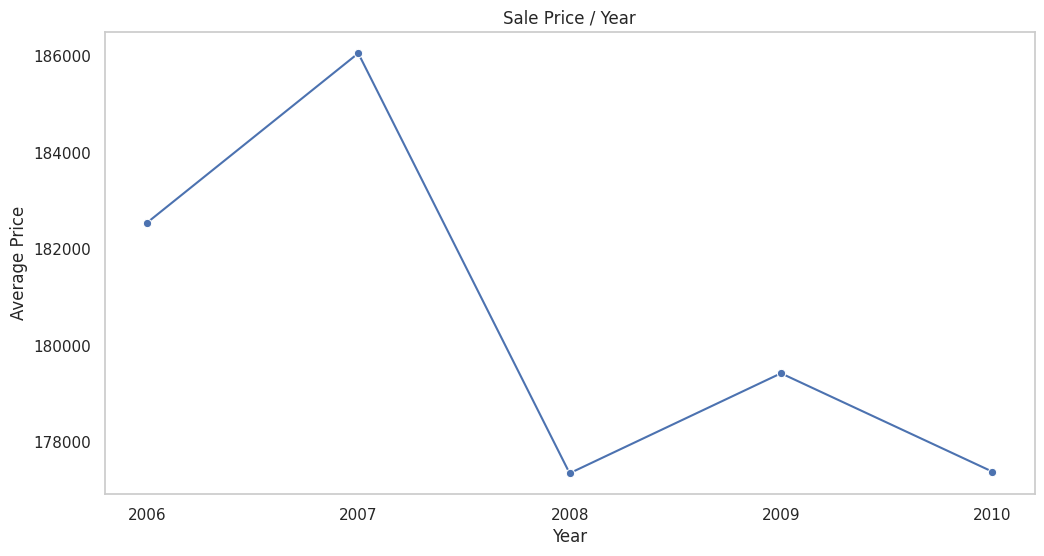

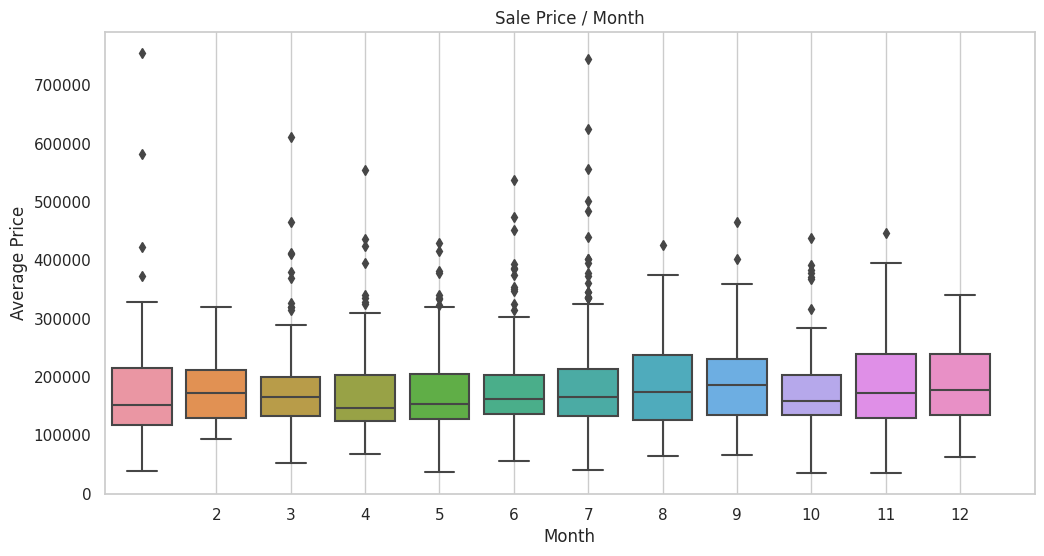

In [37]:
import seaborn as sns

sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.lineplot(data=ds.groupby('YrSold')['SalePrice'].mean().reset_index(), x='YrSold', y='SalePrice', marker='o')
plt.title('Sale Price / Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(ds['YrSold'].unique())
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='MoSold', y='SalePrice', data=ds)
plt.title('Sale Price / Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13))
plt.grid()
plt.show()

The graphs show that, in general, the average monthly cost of housing does not differ much from each other, although in spring and summer there were a large number of sales that differ from the average price in these months of the year.

As for the average price over the years, you can see a sharp drop from 2007 to 2008, after which the price did not rise above 180,000

# Data Preparation

Before we can proceed, we need to convert categorical data to numeric data. To do that, we can use either LabelEncoder or OneHotEncoder. The problem is that there are a lot of columns already and if we will use OneHotEncoder then there will be even more columns. The problem with LabelEncoder is that due to the fact that it changes the values in the column in-place, the model may assume that there is some kind of pattern in this column and not notice other important connections. However, I suggest using LabelEncoder for now.

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in ds.select_dtypes(include=['object']).columns:
    ds[column] = label_encoder.fit_transform(ds[column])

In [39]:
ds

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotArea_Intervals
0,1,60,3,65.0,8450,1,2,3,3,0,...,3,4,4,0,2,2008,8,4,208500,"(1300.0, 19128.75]"
1,2,20,3,80.0,9600,1,2,3,3,0,...,3,4,4,0,5,2007,8,4,181500,"(1300.0, 19128.75]"
2,3,60,3,68.0,11250,1,2,0,3,0,...,3,4,4,0,9,2008,8,4,223500,"(1300.0, 19128.75]"
3,4,70,3,60.0,9550,1,2,0,3,0,...,3,4,4,0,2,2006,8,0,140000,"(1300.0, 19128.75]"
4,5,60,3,84.0,14260,1,2,0,3,0,...,3,4,4,0,12,2008,8,4,250000,"(1300.0, 19128.75]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,3,4,4,0,8,2007,8,4,175000,"(1300.0, 19128.75]"
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,3,2,4,0,2,2010,8,4,210000,"(1300.0, 19128.75]"
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,3,0,2,2500,5,2010,8,4,266500,"(1300.0, 19128.75]"
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,3,4,4,0,4,2010,8,4,142125,"(1300.0, 19128.75]"


We can drop LotArea_Intervals as we don't need it anymore. In addition, let's remove the ID column, since it just shows the serial number of the house in the dataset.

In [40]:
ds.drop(columns=['LotArea_Intervals', 'Id'], inplace=True)

Now let's build a correlation tables to see how different features are related to the target variable.

Since there are 82 columns, I will divide all of them into 4 matrices, each of which will have a target variable and 20 unique features.

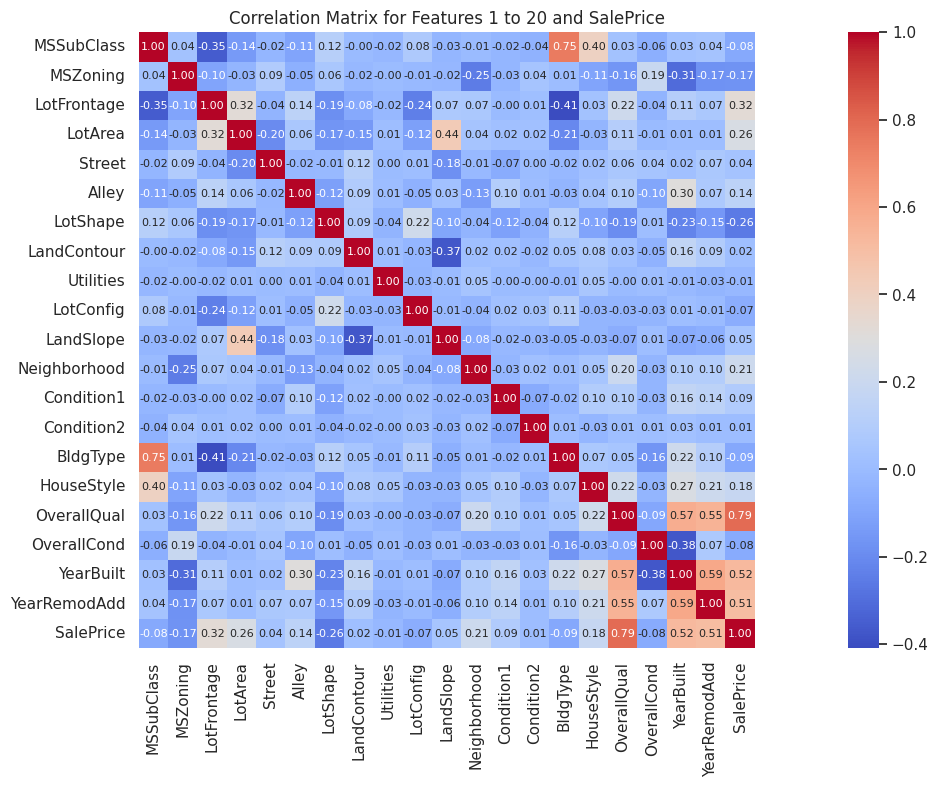

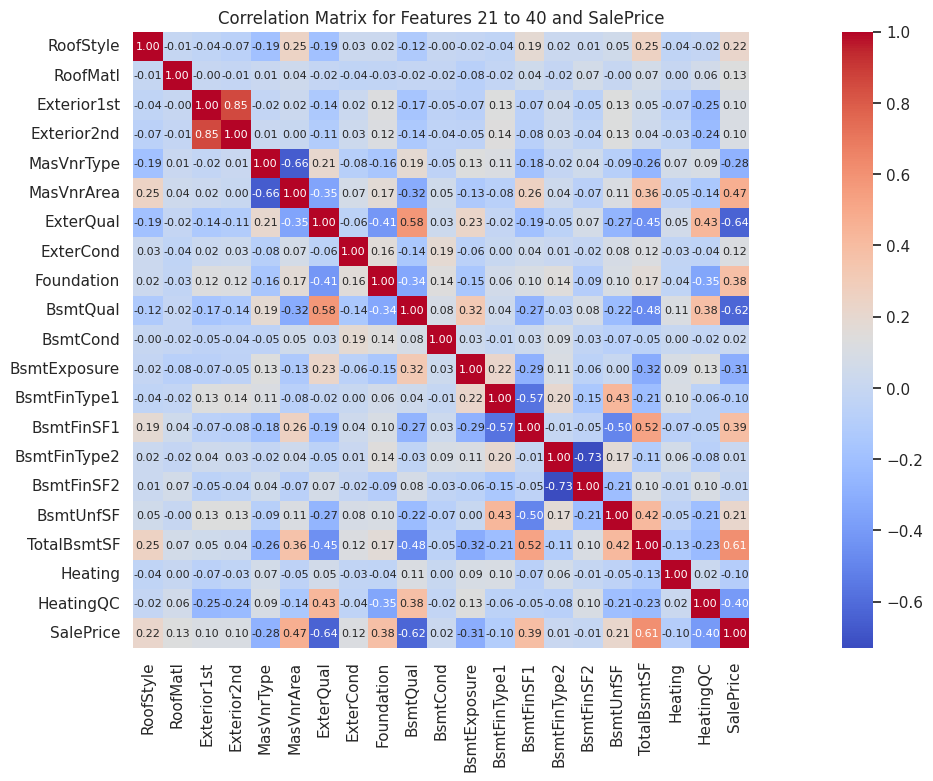

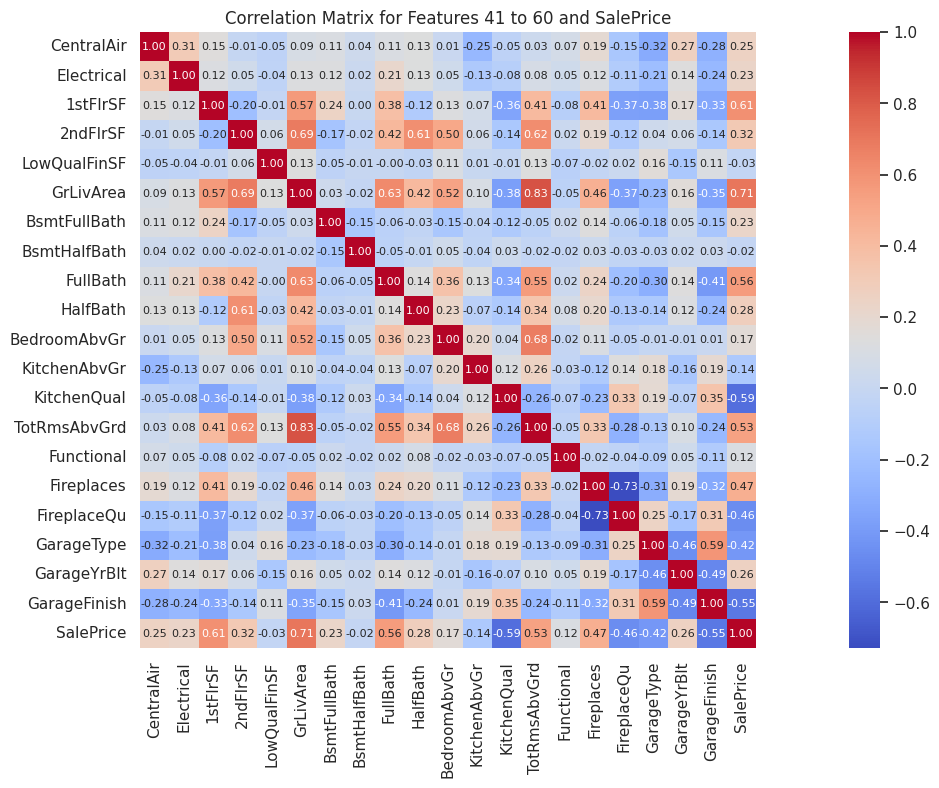

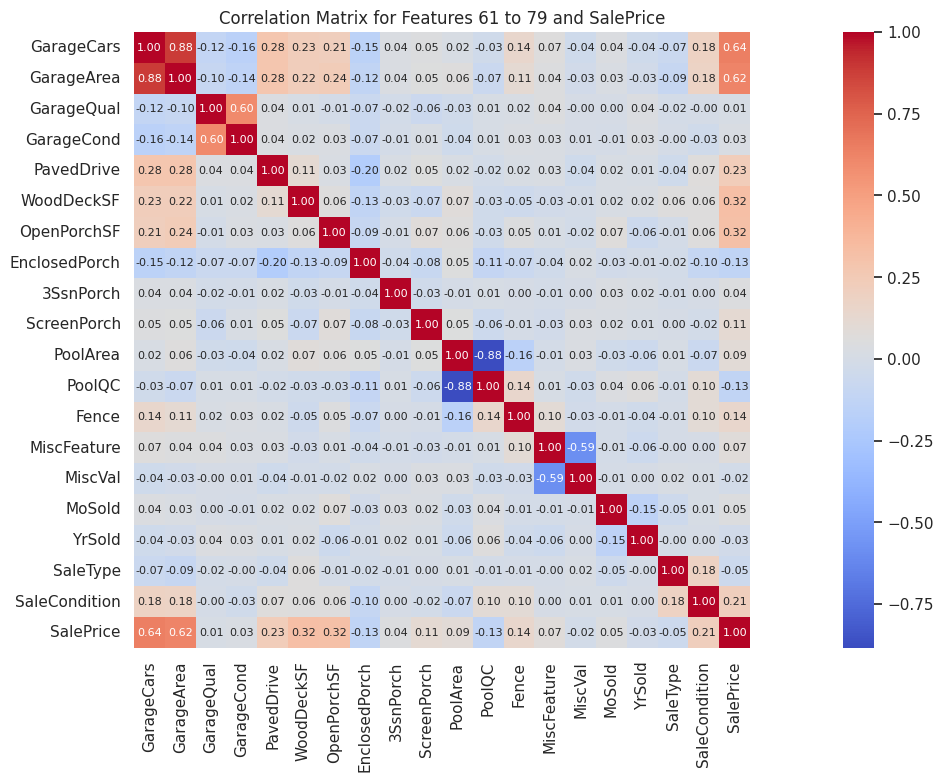

In [41]:
feature_columns = ds.columns[ds.columns != 'SalePrice']

n_cols = 20
n_matrices = len(feature_columns) // n_cols + (len(feature_columns) % n_cols > 0)

for i in range(n_matrices):
    start = i * n_cols
    end = start + n_cols
    current_features = feature_columns[start:end]
    
    subset = ds[current_features.tolist() + ['SalePrice']]
    
    correlation_matrix = subset.corr()
    
    plt.figure(figsize=(24, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, annot_kws={"size": 8})
    plt.title(f'Correlation Matrix for Features {start + 1} to {min(end, len(feature_columns))} and SalePrice')
    plt.show()

We can see that there are many features that correlate quite strongly with the target.

It is also worth noting that some features correlate with each other. This can lead to multicollinearity. Let's apply PCA to fix this.

Let's keep the target variable, SalePrice, because we don't need to transform it.

In [42]:
target = ds['SalePrice']

ds = ds.drop(['SalePrice'], axis=1)

In [43]:
ds

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,2,3,3,0,4,...,0,0,3,4,4,0,2,2008,8,4
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,0,3,4,4,0,5,2007,8,4
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,0,3,4,4,0,9,2008,8,4
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,0,3,4,4,0,2,2006,8,0
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,0,3,4,4,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,2,3,3,0,4,...,0,0,3,4,4,0,8,2007,8,4
1456,20,3,85.0,13175,1,2,3,3,0,4,...,0,0,3,2,4,0,2,2010,8,4
1457,70,3,66.0,9042,1,2,3,3,0,4,...,0,0,3,0,2,2500,5,2010,8,4
1458,20,3,68.0,9717,1,2,3,3,0,4,...,0,0,3,4,4,0,4,2010,8,4


First of all, let's apply StandardScaler to the dataset. This is important because PCA is sensitive to feature scales.

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(ds), columns=ds.columns, index=ds.index)

df_scaled

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.073375,-0.045532,-0.252376,-0.207142,0.064238,0.244717,0.750731,0.314667,-0.02618,0.604670,...,-0.270208,-0.068692,0.063305,0.457447,0.191594,-0.087688,-1.599111,0.138777,0.313867,0.208502
1,-0.872563,-0.045532,0.398087,-0.091886,0.064238,0.244717,0.750731,0.314667,-0.02618,-0.628316,...,-0.270208,-0.068692,0.063305,0.457447,0.191594,-0.087688,-0.489110,-0.614439,0.313867,0.208502
2,0.073375,-0.045532,-0.122284,0.073480,0.064238,0.244717,-1.378933,0.314667,-0.02618,0.604670,...,-0.270208,-0.068692,0.063305,0.457447,0.191594,-0.087688,0.990891,0.138777,0.313867,0.208502
3,0.309859,-0.045532,-0.469197,-0.096897,0.064238,0.244717,-1.378933,0.314667,-0.02618,-1.861302,...,-0.270208,-0.068692,0.063305,0.457447,0.191594,-0.087688,-1.599111,-1.367655,0.313867,-3.426284
4,0.073375,-0.045532,0.571543,0.375148,0.064238,0.244717,-1.378933,0.314667,-0.02618,-0.628316,...,-0.270208,-0.068692,0.063305,0.457447,0.191594,-0.087688,2.100892,0.138777,0.313867,0.208502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.045532,-0.382469,-0.260560,0.064238,0.244717,0.750731,0.314667,-0.02618,0.604670,...,-0.270208,-0.068692,0.063305,0.457447,0.191594,-0.087688,0.620891,-0.614439,0.313867,0.208502
1456,-0.872563,-0.045532,0.614908,0.266407,0.064238,0.244717,0.750731,0.314667,-0.02618,0.604670,...,-0.270208,-0.068692,0.063305,-1.390058,0.191594,-0.087688,-1.599111,1.645210,0.313867,0.208502
1457,0.309859,-0.045532,-0.209012,-0.147810,0.064238,0.244717,0.750731,0.314667,-0.02618,0.604670,...,-0.270208,-0.068692,0.063305,-3.237563,-4.759330,4.953112,-0.489110,1.645210,0.313867,0.208502
1458,-0.872563,-0.045532,-0.122284,-0.080160,0.064238,0.244717,0.750731,0.314667,-0.02618,0.604670,...,-0.270208,-0.068692,0.063305,0.457447,0.191594,-0.087688,-0.859110,1.645210,0.313867,0.208502


Now let's import PCA and use it

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

df_pca = pd.DataFrame(pca.fit_transform(df_scaled))

Now our dataset contains only 59 columns. Let's check correlation matrix as we did before

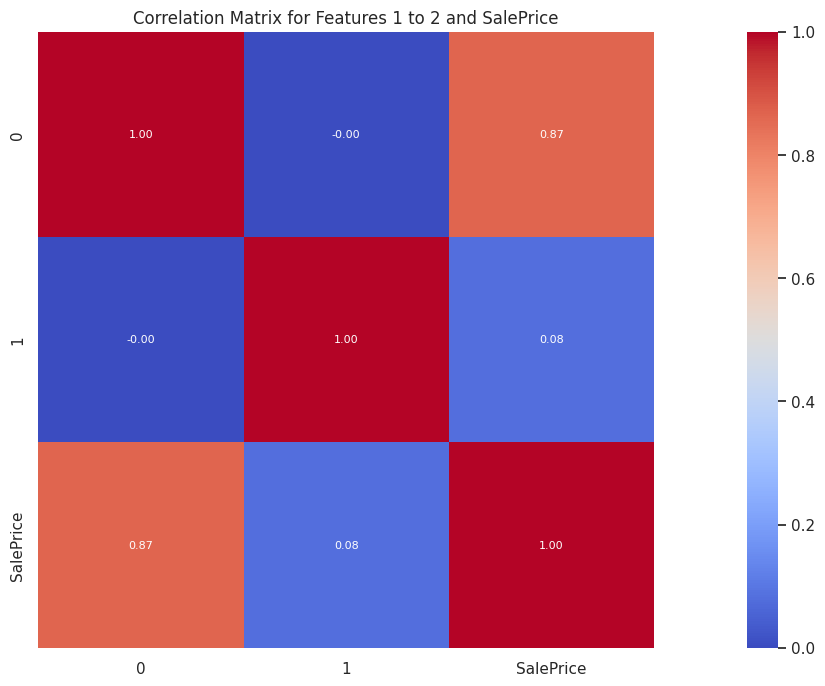

In [46]:
df_pca['SalePrice'] = target

feature_columns = df_pca.columns

n_cols = 2
n_matrices = len(feature_columns) // n_cols + (len(feature_columns) % n_cols > 0) - 1

for i in range(n_matrices):
    start = i * n_cols
    end = start + n_cols
    current_features = feature_columns[start:end]
    
    subset = df_pca[current_features.tolist() + ['SalePrice']]
    
    correlation_matrix = subset.corr()
    
    plt.figure(figsize=(24, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, annot_kws={"size": 8})
    plt.title(f'Correlation Matrix for Features {start + 1} to {min(end, len(feature_columns))} and SalePrice')
    plt.show()

Let's train simple RandomForestRegressor on this data

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_pca.drop(['SalePrice'], axis=1), target, test_size=0.2, random_state=42)

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

RFG = RandomForestRegressor()

RFG.fit(X_train, y_train)

y_pred = RFG.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

MSE: 1057846814.69
MAE: 21629.58
RMSE: 32524.56
R-squared: 0.86


Result is not that bad. Let's try using a grid search to find the best hyperparameters and (possibly) improve the results.

In [49]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [100, 200, 300, 400, 500],
              'min_samples_split':[2, 5, 7, 9, 12],
              'min_samples_leaf': [1, 4, 7, 9, 12]}

clf = GridSearchCV(RFG, parameters)

clf.fit(X_train, y_train)

print(f"Best params: {clf.best_params_}")

Best params: {'min_samples_leaf': 9, 'min_samples_split': 7, 'n_estimators': 100}


Train and see the results

# 

In [50]:
RFG = RandomForestRegressor(min_samples_leaf=9, min_samples_split=2, n_estimators=100)

RFG.fit(X_train, y_train)

y_pred = RFG.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

MSE: 1188492848.83
MAE: 20981.23
RMSE: 34474.52
R-squared: 0.85


You may notice that the results are not much different. In any case, we will do cross-validation for both the default model and the model with the selected parameters.

First, default model

In [51]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

#df_pca = df_pca.drop(['SalePrice'], axis=1)

RFG = RandomForestRegressor()

for fold_number, (train_index, test_index) in enumerate(kf.split(df_pca), start=1):
    X_train, X_test = df_pca.iloc[train_index], df_pca.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    RFG.fit(X_train, y_train)
    
    y_pred = RFG.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Fold: {fold_number}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print('\n')

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

Now with params

In [ ]:
RFG = RandomForestRegressor(min_samples_leaf=9, min_samples_split=2, n_estimators=100)

for fold_number, (train_index, test_index) in enumerate(kf.split(df_pca), start=1):
    X_train, X_test = df_pca.iloc[train_index], df_pca.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    RFG.fit(X_train, y_train)
    
    y_pred = RFG.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Fold: {fold_number}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print('\n')

# Working with Test Dataset

Now, let's read test.csv and do same things with this dataset.

In [ ]:
df_test = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')

df_test

Before we check how many missing values there are in the columns, I suggest replacing the missing values in columns with the object type with Nothing (or any other word) so that we don't get these values as missing (they just mean that the house doesn't have this feature)

In [ ]:
df_test[df_test.select_dtypes(include=['object']).columns] = df_test.select_dtypes(include=['object']).fillna('Nothing')

Now let's check missing values

In [ ]:
df_test.isnull().sum().plot.bar(figsize=(20,10), title='Number of missing values in test dataset')

We already know how to deal with some of them. For example, let's check MasVnrArea values

In [ ]:
df_test['MasVnrArea'].value_counts()

Same situation as with train data. Replace with most popular value - 0.

In [ ]:
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)

Move to GarageYrBlt. 

In [ ]:
df_test[df_test['GarageType'] == 'Nothing'][['GarageYrBlt']].isnull().sum()

Same situation as with train data. Replace with -1.

In [ ]:
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(-1)

Move to LotFrontage.  I'm going to do the same thing I did in the train dataset. No Markdowns here as I described each step when I was working with the train dataset.

In [ ]:
Xmin = df_test['LotArea'].min()
Xmax = df_test['LotArea'].max()
Xmin, Xmax

In [ ]:
interval_length = (Xmax - Xmin)/12
print(f"The interval length: {interval_length}")

In [ ]:
bins = pd.interval_range(start=Xmin, end=Xmax, freq=interval_length, closed='right')
bins

In [ ]:
df_test['LotArea_Intervals'] = pd.cut(df_test['LotArea'], bins=bins)
df_test

Manually adding first interval

In [ ]:
df_test[df_test['LotArea'] == 1470]

In [ ]:
df_test.loc[1449, 'LotArea_Intervals'] = pd.Interval(1470.0,  6064.166666666667, closed='right')

In [ ]:
df_test[df_test['LotArea'] == 1470]

In [ ]:
print(f"Total NaNs in the LotArea_Intervals column: {df_test['LotArea_Intervals'].isnull().sum()}")

In [ ]:
mean_values = df_test.groupby(['LotArea_Intervals', 'LotShape', 'LotConfig'])['LotFrontage'].mean().reset_index()
mean_values.rename(columns={'LotFrontage': 'MeanLotFrontage'}, inplace=True)
df_test = df_test.merge(mean_values, on=['LotArea_Intervals', 'LotShape', 'LotConfig'], how='left')
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['MeanLotFrontage'])
df_test.drop(columns=['MeanLotFrontage'], inplace=True)

In [ ]:
print(f"Total NaNs in the LotFrontage column: {df_test['LotFrontage'].isnull().sum()}")

In [ ]:
mean_values = df_test.groupby(['LotShape'])['LotFrontage'].mean().reset_index()
mean_values.rename(columns={'LotFrontage': 'MeanLotFrontage'}, inplace=True)
df_test = df_test.merge(mean_values, on=['LotShape'], how='left')
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['MeanLotFrontage'])
df_test.drop(columns=['MeanLotFrontage'], inplace=True)

In [ ]:
print(f"Total NaNs in the LotFrontage column: {df_test['LotFrontage'].isnull().sum()}")

Alright. Let's check where else there are missing values.

In [ ]:
df_test.isnull().sum().plot.bar(figsize=(20,10), title='Number of missing values in test dataset')

We have 2 NaNs in BsmtFullBath and BsmtHalfBath, and 1 Nan in BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, and in GarageCars and GarageArea.

Let's print out row with GarageCars = NaN

In [ ]:
df_test[df_test['GarageCars'].isnull()][['GarageCars', 'GarageArea', 'GarageYrBlt']]

As we can see, the garage has not been built, so we can simply replace the NaNs with 0.

In [ ]:
df_test['GarageCars'] = df_test['GarageCars'].fillna(0)
df_test['GarageArea'] = df_test['GarageArea'].fillna(0)

Let's check if we have the same situation with basement.

In [ ]:
df_test[df_test['BsmtFinSF1'].isnull()][['BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

Yup. Replacing them with zeros

In [ ]:
df_test[['BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']] = df_test[['BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].fillna(0)

Now with basement baths

In [ ]:
df_test[df_test['BsmtCond']=='Nothing'][['BsmtFullBath', 'BsmtHalfBath']]

As we can see, in every single row where BsmtCond == Nothing (which means no basement) FullBath and HalfBath = 0. Replace NaNs with 0.

In [ ]:
df_test[['BsmtFullBath', 'BsmtHalfBath']] = df_test[['BsmtFullBath', 'BsmtHalfBath']].fillna(0)

In [ ]:
df_test.isnull().sum().plot.bar(figsize=(20,10), title='Number of missing values in test dataset')

This is it. We have succesfully fixed the test dataset. Now let's use StandardScaler, PCA and our model to predict prices. First of all, encode categorical data

In [ ]:
label_encoder = LabelEncoder()

for column in df_test.select_dtypes(include=['object']).columns:
    df_test[column] = label_encoder.fit_transform(df_test[column])

Drop useless columns

In [ ]:
df_test = df_test.drop(['LotArea_Intervals',	'MeanLotFrontage_x',	'MeanLotFrontage_y', 'Id'], axis=1)

Scale data

In [ ]:
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns, index=df_test.index)

df_scaled

In [ ]:
pca = PCA(n_components=2)

df_test_pca = pd.DataFrame(pca.fit_transform(df_scaled))

# Submission and results

In [ ]:
predictions = RFG.predict(df_test_pca)

In [ ]:
ids = range(1461, 2920)

data = {'Id': ids, 'SalePrice': predictions}

submission = pd.DataFrame(data)
submission.to_csv('submission.csv', index=False)

I've got 20227.52321 RMSE between the logarithm of the predicted value and the logarithm of the observed sales price. 

Todo: 

1. check model results on the dataset without PCA;
2. drop features with correlation < 0.5 and check results;
3. check different models.


**This notebook will be updated as soon as possible!**
